# Linear regression


#### 1. Load the provided .npy files. You can load it with numpy.
 - each file contains one vector, X and y
 - visualize X vs y on a scatter plot
 - fit an $y = w_0 + w_1\cdot X + w_2 \cdot X^2$ linear regression using sklearn

#### 2. Using different features
 - plot the residuals (the difference between the prediction and the actual $y$) vs the original $y$
 - a non-random-noise like pattern suggests non-linear connection between the features and the predictions
 - someone told us that the connection between X and y is $y = A \cdot X + B \cdot \cos^3(X) + C\cdot X^2 + D$
    - using sklearn's linear regression estimate $A, B, C, D$!
 - plot the residuals again! is it better now?

#### 3. Other methdods than sklearn for linear regression
 - using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
 - is the result the same? if not guess, why? (did you not forget to add the constant term?)
 - try to get the same results with statsmodels as with sklearn!
 - using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?

#### 4. 
 - load the real_estate.csv to a pandas dataframe
 - drop the ID column and the geographic location columns
 - fit a linear regression model to predict the unit price using sklearn

#### 5. 
 - interpret the coefficients and their meaning shortly with your own words
 - plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# Task 1

In [2]:
X = np.load('X.npy')
y = np.load('y.npy')

Text(0, 0.5, 'y')

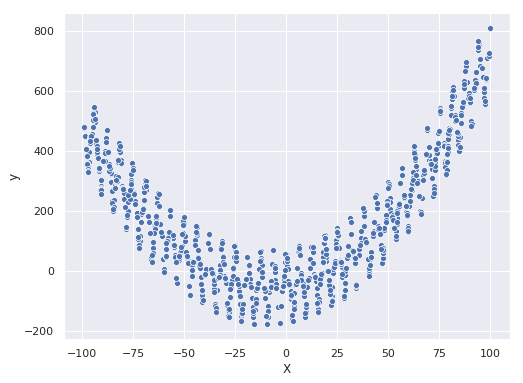

In [3]:
plt.figure(figsize=(8,6))
sns.scatterplot(X,y)
plt.xlabel('X', size=12)
plt.ylabel('y', size=12)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


# transforming our data to fit a quadratic curve with the linear regression
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X.reshape(-1, 1), y)
prediction =  model.predict(X.reshape(-1, 1))

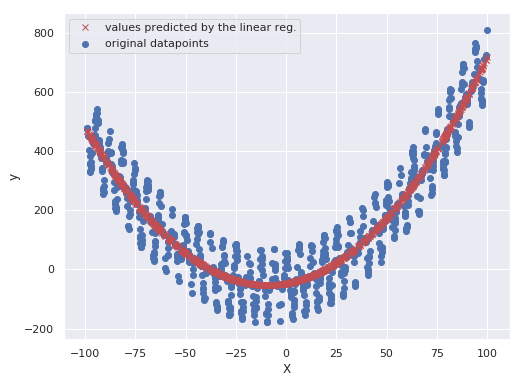

In [5]:
plt.figure(figsize=(8,6))
plt.plot(X,prediction, 'x', color='r', label='values predicted by the linear reg.')
plt.scatter(X, y, marker='o', color='b', label='original datapoints')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')

# Task 2

In [6]:
residual = (y - prediction)

Text(0.5, 1.0, 'Residuals vs original y')

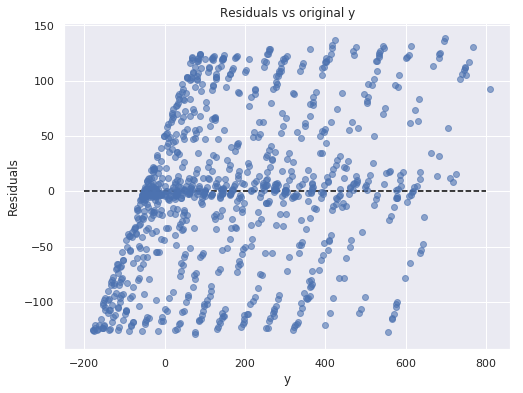

In [7]:
plt.figure(figsize=(8,6))
plt.plot(y, residual, 'o', alpha=0.6)
plt.hlines(xmin=-200, xmax=800, y=0, color='black', linestyle='--')
plt.xlabel('y')
plt.ylabel('Residuals')
plt.title('Residuals vs original y')

In [8]:
# transforming X
df = pd.DataFrame(X)
df[1] = np.cos(X)**3
df[2] = X**2
df[3] = [1 for i in X]

In [9]:
df.head()

,0,1,2,3
0,-25.091976,0.997510,629.607271,1
1,90.142861,-0.185966,8125.735440,1
2,46.398788,-0.419235,2152.847561,1
3,19.731697,0.256653,389.339860,1
4,-68.796272,0.856354,4732.927029,1


In [10]:
# fitting linear reg. to transformed X-s
model2 = LinearRegression()
model2.fit(df, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
coefs = model2.coef_
print('A=', coefs[0], 'B=', coefs[1], 'C=', coefs[2], 'D=', coefs[3])

A= 1.1967685256358915 B= 123.56766140052731 C= 0.06569863215577243 D= 0.0


In [12]:
prediction2 = model2.predict(df)
residual2 = (y - prediction2)

Text(0.5, 1.0, 'New residuals vs original y')

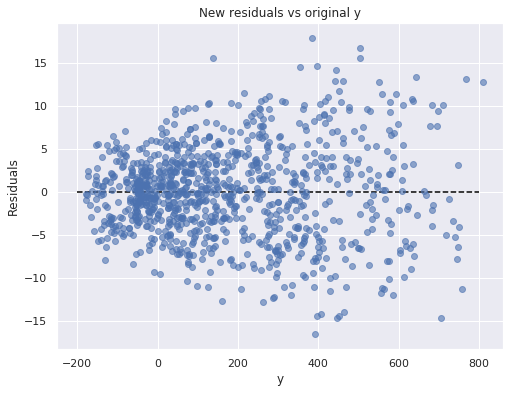

In [13]:
plt.figure(figsize=(8,6))
plt.plot(y, residual2, 'o', alpha=0.6)
plt.hlines(xmin=-200, xmax=800, y=0, color='black', linestyle='--')
plt.xlabel('y')
plt.ylabel('Residuals')
plt.title('New residuals vs original y')

The new plot seems more like random noise, the points are more dense near the 0 line and they are somewhat symmetric. Unlike the previous plot, we can't see any patterns in the residuals as we go along the x axis. This is a better residual plot for sure.

# Task 3

In [14]:
import statsmodels.api as sm

In [15]:
# performing the same linear regression using statsmodel
df2 = sm.add_constant(df)
results_ols = sm.OLS(y, df2).fit()

print('params using statsmodels:')
print(results_ols.params)
print('-------------------------------------------------------------')
print('params using sklearn:')
print(coefs)
print(model2.intercept_)

params using statsmodels:
0      1.196769
1    123.567661
2      0.065699
3    -50.071093
dtype: float64
-------------------------------------------------------------
params using sklearn:
[1.19676853e+00 1.23567661e+02 6.56986322e-02 0.00000000e+00]
-50.071092692618095


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


In [16]:
df_m = np.array(df)

In [17]:
w = (np.linalg.inv((np.transpose(df_m) @ df_m)) @ np.transpose(df_m)) @ y

In [18]:
print('Parameters using the normal equation:\n',w)

Parameters using the normal equation:
 [ 1.19676853e+00  1.23567661e+02  6.56986322e-02 -5.00710927e+01]


The parameters seems to match using all 3 methods

# Task 4

In [19]:
re = pd.read_csv('real_estate.csv')

In [20]:
re.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [21]:
re.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

No missing values to handle

In [22]:
# dropping index and geographical data
re.drop(['No', 'X5 latitude', 'X6 longitude'], axis=1, inplace=True)

In [23]:
re_X = re.drop(['Y house price of unit area'], axis=1)
re_y = re['Y house price of unit area']

In [24]:
model3 = LinearRegression()
model3.fit(re_X, re_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Task 5

In [25]:
print(model3.coef_)

[ 5.77804282e+00 -2.54477973e-01 -5.51299698e-03  1.25786410e+00]


Each coefficient represents the difference in the predicted value of Y for each one-unit difference in the selected coefficient, if the others remain constant.

In [26]:
prediction3 = model3.predict(re_X)
residual3 = (re_y - prediction3)

Text(0.5, 1.0, 'Residuals vs y')

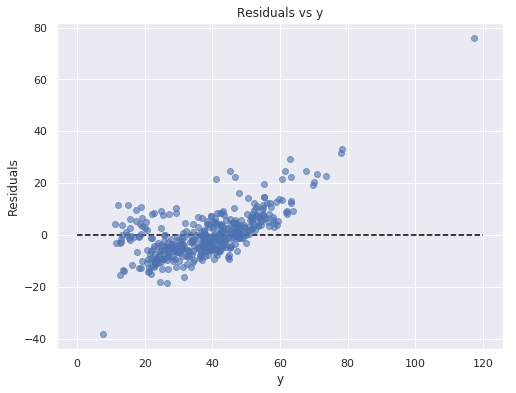

In [27]:
plt.figure(figsize=(8,6))
plt.plot(re_y, residual3, 'o', alpha=0.6)
plt.hlines(xmin=0, xmax=120, y=0, color='black', linestyle='--')
plt.xlabel('y')
plt.ylabel('Residuals')
plt.title('Residuals vs y')

Let's say we have to buy the house for the price based on the prediction of the algorithm. In this case I would buy the house which is represented by the point in the upper right corner. We know that the residual is the real value - the predicted value, because of this I could by the house for a price cheaper than it's real value, that means profit.  